# Hyperparameter Tuning 

I'll be showing how you can use Optuna to tune the hyperparameters of a model. I'll be using three models to illustrate this: elasticnet regression, random forest, and gradient boosting. I'll also be using the [Diabetes dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset) from scikit-learn.

In [5]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import RobustScaler

import matplotlib.pyplot as plt

Plan: Show how altering lambda will change the number of non-zero coefficients in lasso

In [61]:
def load_data():
    data = load_breast_cancer()
    X = data.data
    y = data.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    return X_train, X_test, y_train, y_test


def train_model(X_train, y_train, alpha):
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    return model


def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_binary = [1 if y >= 0.5 else 0 for y in y_pred]
    score = accuracy_score(y_test, y_pred_binary)
    return score

In [97]:
alpha_list = np.logspace(0.001, .1, 100)
results = []
num_coefs = []


for alpha in alpha_list:
    X_train, X_test, y_train, y_test = load_data()
    model = train_model(X_train, y_train, alpha)
    score = evaluate_model(model, X_test, y_test)
    results.append(score)
    num_coefs.append(int(np.sum(model.coef_ != 0)))

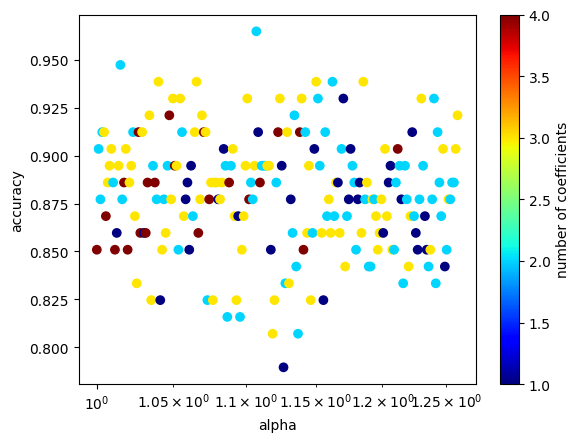

In [91]:
plt.scatter(alpha_list, results, c=num_coefs, cmap="jet")
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.colorbar(label="number of coefficients")
plt.show()

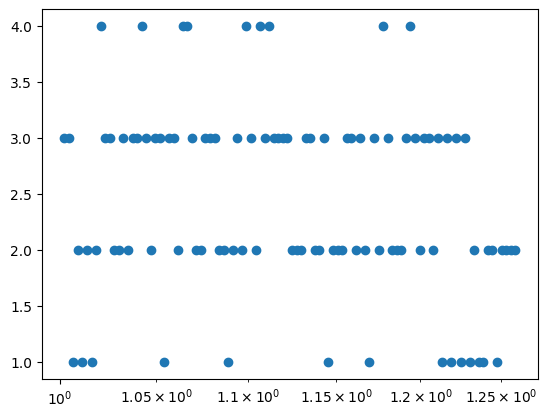

In [98]:
plt.scatter(alpha_list, num_coefs)
plt.xscale("log")

The basic idea of optuna is to define an objective function that returns a score. Optuna will then try to minimize this score. The score can be anything you want, but it's usually something like mean squared error or accuracy. Optuna will then try different hyperparameters to find the best score. It does this by using a technique called [Tree-structured Parzen Estimator](https://optuna.readthedocs.io/en/stable/reference/samplers/generated/optuna.samplers.TPESampler.html#optuna.samplers.TPESampler). I won't go into the details of how this works, but you can read about it in the documentation (I recommend it, it's pretty interesting 😊).